<a href="https://www.quantrocket.com"><img alt="QuantRocket logo" src="https://www.quantrocket.com/assets/img/notebook-header-logo.png"></a><br>
<a href="https://www.quantrocket.com/disclaimer/">Disclaimer</a>

***
[QVAL: Quantitative Value](Introduction.ipynb) › Part 4: Moonshot Backtest
***

# Moonshot Backtest

Notebooks provide a great way to develop your strategy logic interactively, but Moonshot backtests and parameter scans are often superior tools for running the code and analyzing performance, especially for large datasets that may not fit into memory.

Because Moonshot is pandas-based, your interactive strategy code can readily be transferred to a Moonshot strategy. The file [qval.py](qval.py) contains our transferred strategy code. To facilitate parameter scans, we've factored out some hard coded parameters and stored them as class attributes on the strategy (see for example `VALUE_TOP_N_PCT` and `QUALITY_TOP_N_PCT`).

## Install strategy file

Moonshot looks for strategies inside the "moonshot" directory, so execute the following cell to "install" the strategy by moving the file to that location: 

> The `!` sytax below lets us execute terminal commands from inside the notebook. 

In [1]:
# make directory if doesn't exist
!mkdir -p /codeload/moonshot

!mv qval.py /codeload/moonshot/

Moonshot reloads this file each time you run a backtest. Thus, any edits you make to `qval.py` will automatically be reflected in the subsequent backtest.

## Run backtest

Note the `CODE` we assigned to our strategy, "qval":

```python
class QuantitativeValue(Moonshot):
   
    CODE = "qval"
```

This is how we refer to this strategy for running a backtest.

Since this strategy requires a large amount of fundamental and price data, we probably can't load a 10-20 year backtest into memory. We use the `segment` parameter to tell Moonshot to run the backtest in 1-year segments and concatenate the results. ("A" is the [pandas offset alias](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases) for annual frequency.)   

> We've added Jupyter's `%time` magic to provide a gauge of total runtime for this backtest. 

> TIP: open the detailed logs while running the backtest to monitor moonshot's progress through the backtest segments.

In [2]:
from quantrocket.moonshot import backtest
%time backtest("qval", start_date="2010-01-01", end_date="2018-01-01", segment="A", filepath_or_buffer="qval_backtest.csv")

CPU times: user 0 ns, sys: 20 ms, total: 20 ms
Wall time: 1min 12s


## Performance tear sheets

We can view a performance tear sheet using Moonchart, a companion library to Moonshot, as well as with pyfolio.

### Moonchart

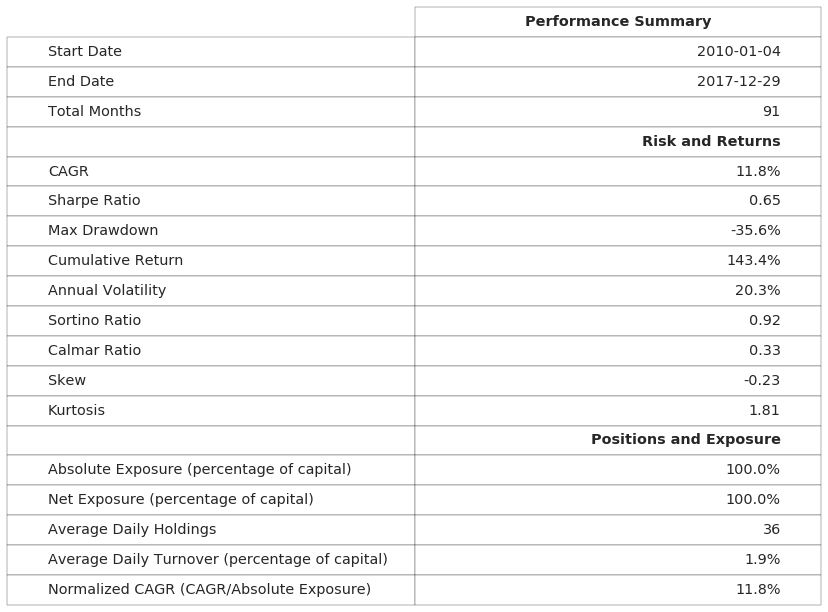

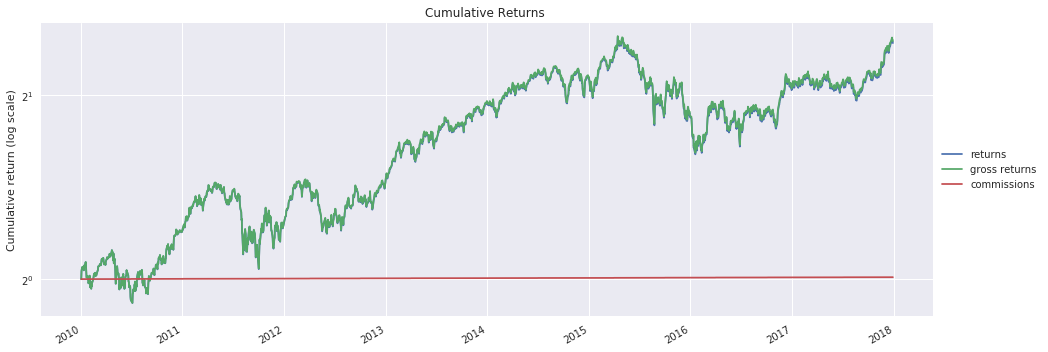

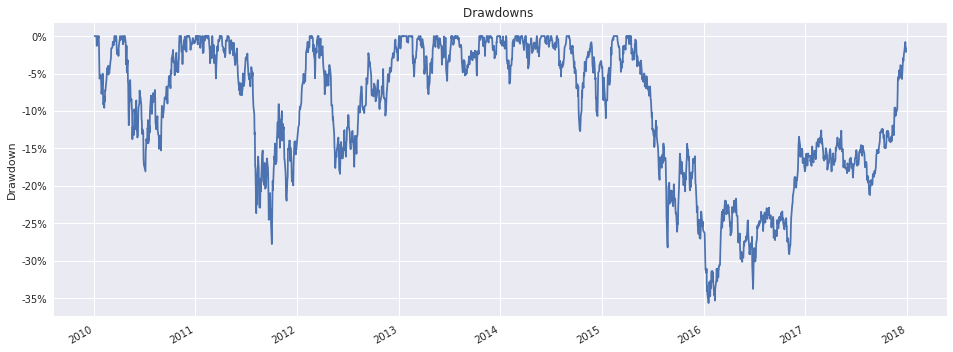

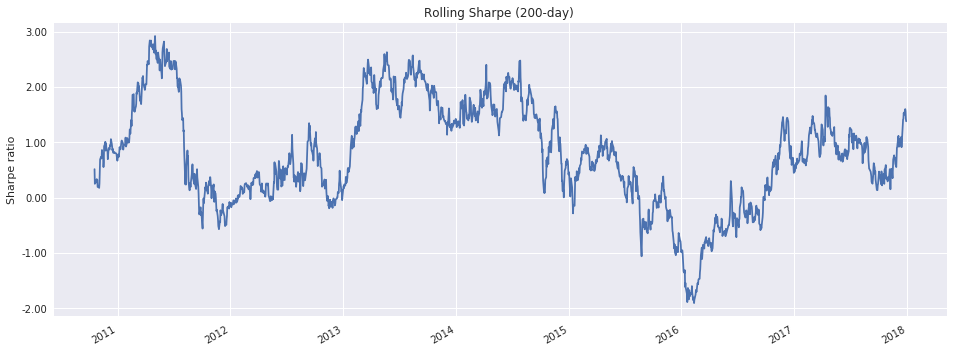

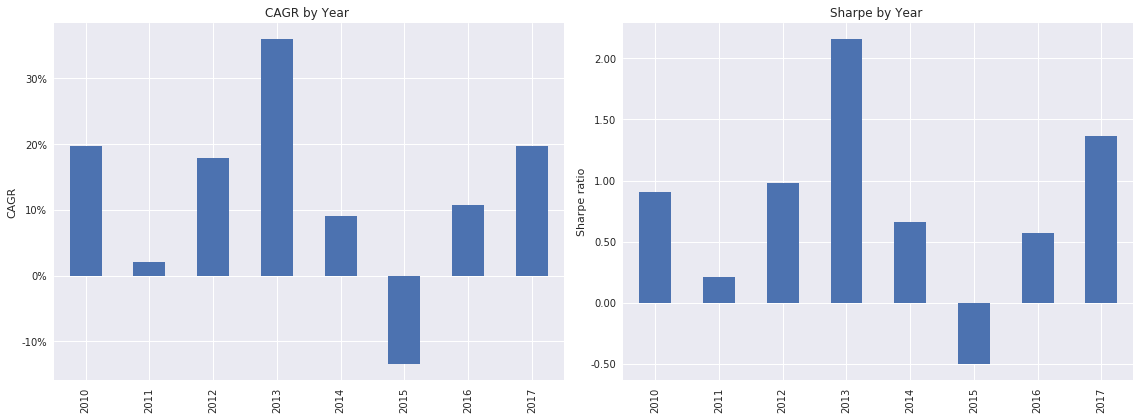

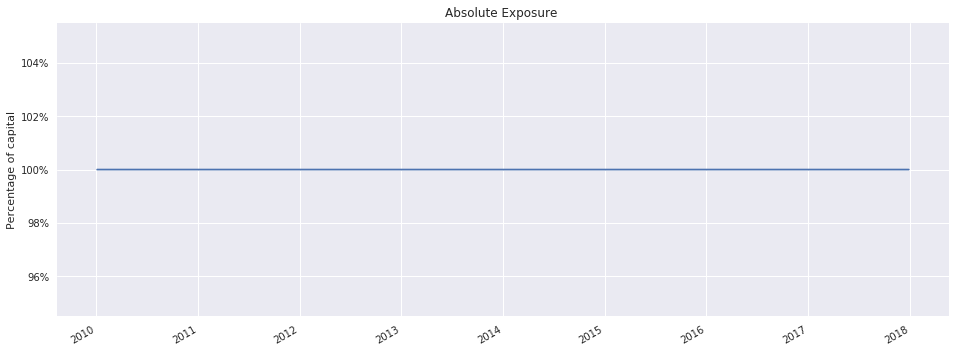

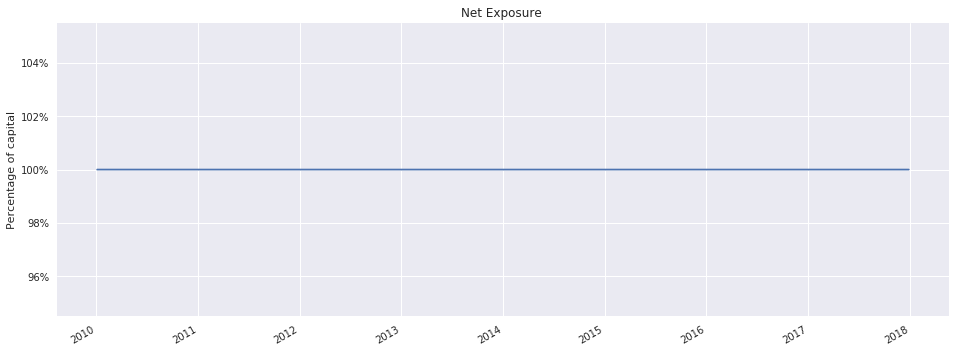

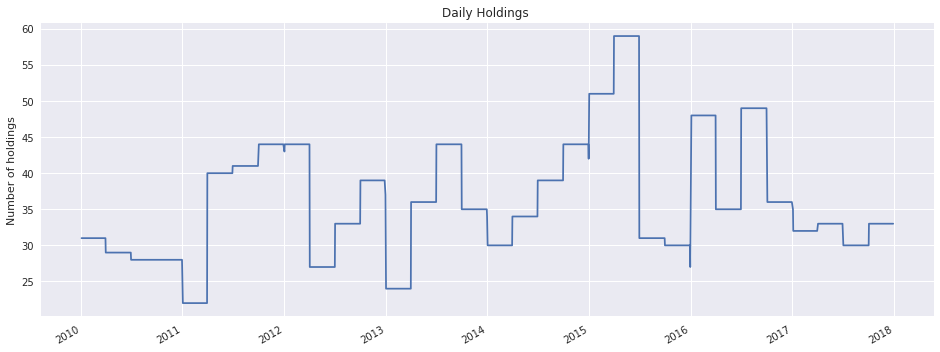

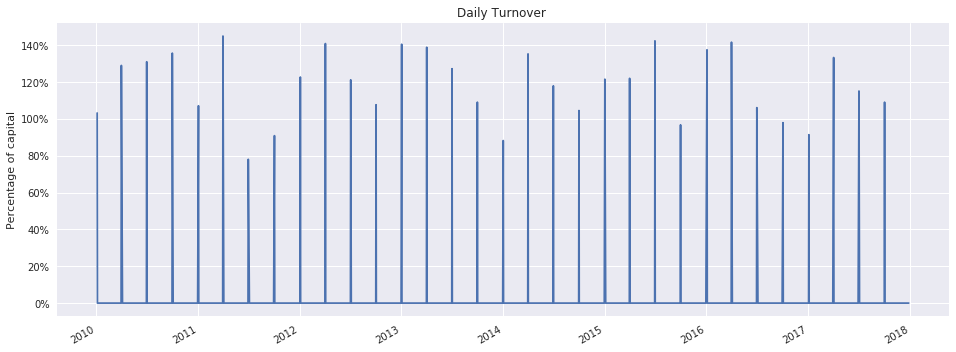

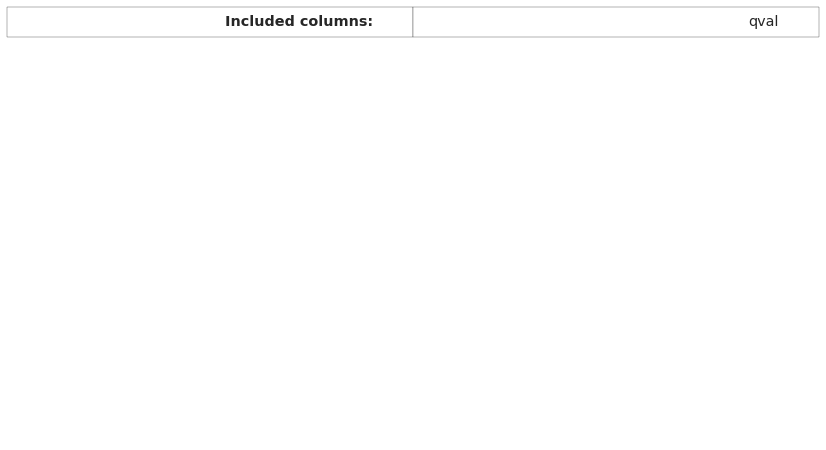

In [3]:
from moonchart import Tearsheet
Tearsheet.from_moonshot_csv("qval_backtest.csv")

### Pyfolio

In [4]:
import pyfolio as pf

Start date,2010-01-04
End date,2017-12-29
Total months,95
,Backtest
Annual return,11.8%
Cumulative returns,143.4%
Annual volatility,20.3%
Sharpe ratio,0.65
Calmar ratio,0.33
Stability,0.76
Max drawdown,-35.6%


/opt/conda/lib/python3.6/site-packages/numpy/core/fromnumeric.py:52: FutureWarning: 'argmin' is deprecated, use 'idxmin' instead. The behavior of 'argmin'
will be corrected to return the positional minimum in the future.
Use 'series.values.argmin' to get the position of the minimum now.
  return getattr(obj, method)(*args, **kwds)


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,35.64,2015-04-15,2016-01-19,NaT,NaN
1,27.75,2011-04-29,2011-10-03,2012-02-16,210
2,18.39,2012-03-19,2012-06-04,2013-01-02,208
3,18.07,2010-04-23,2010-07-06,2010-11-05,141
4,12.69,2014-09-05,2014-10-15,2015-02-12,115


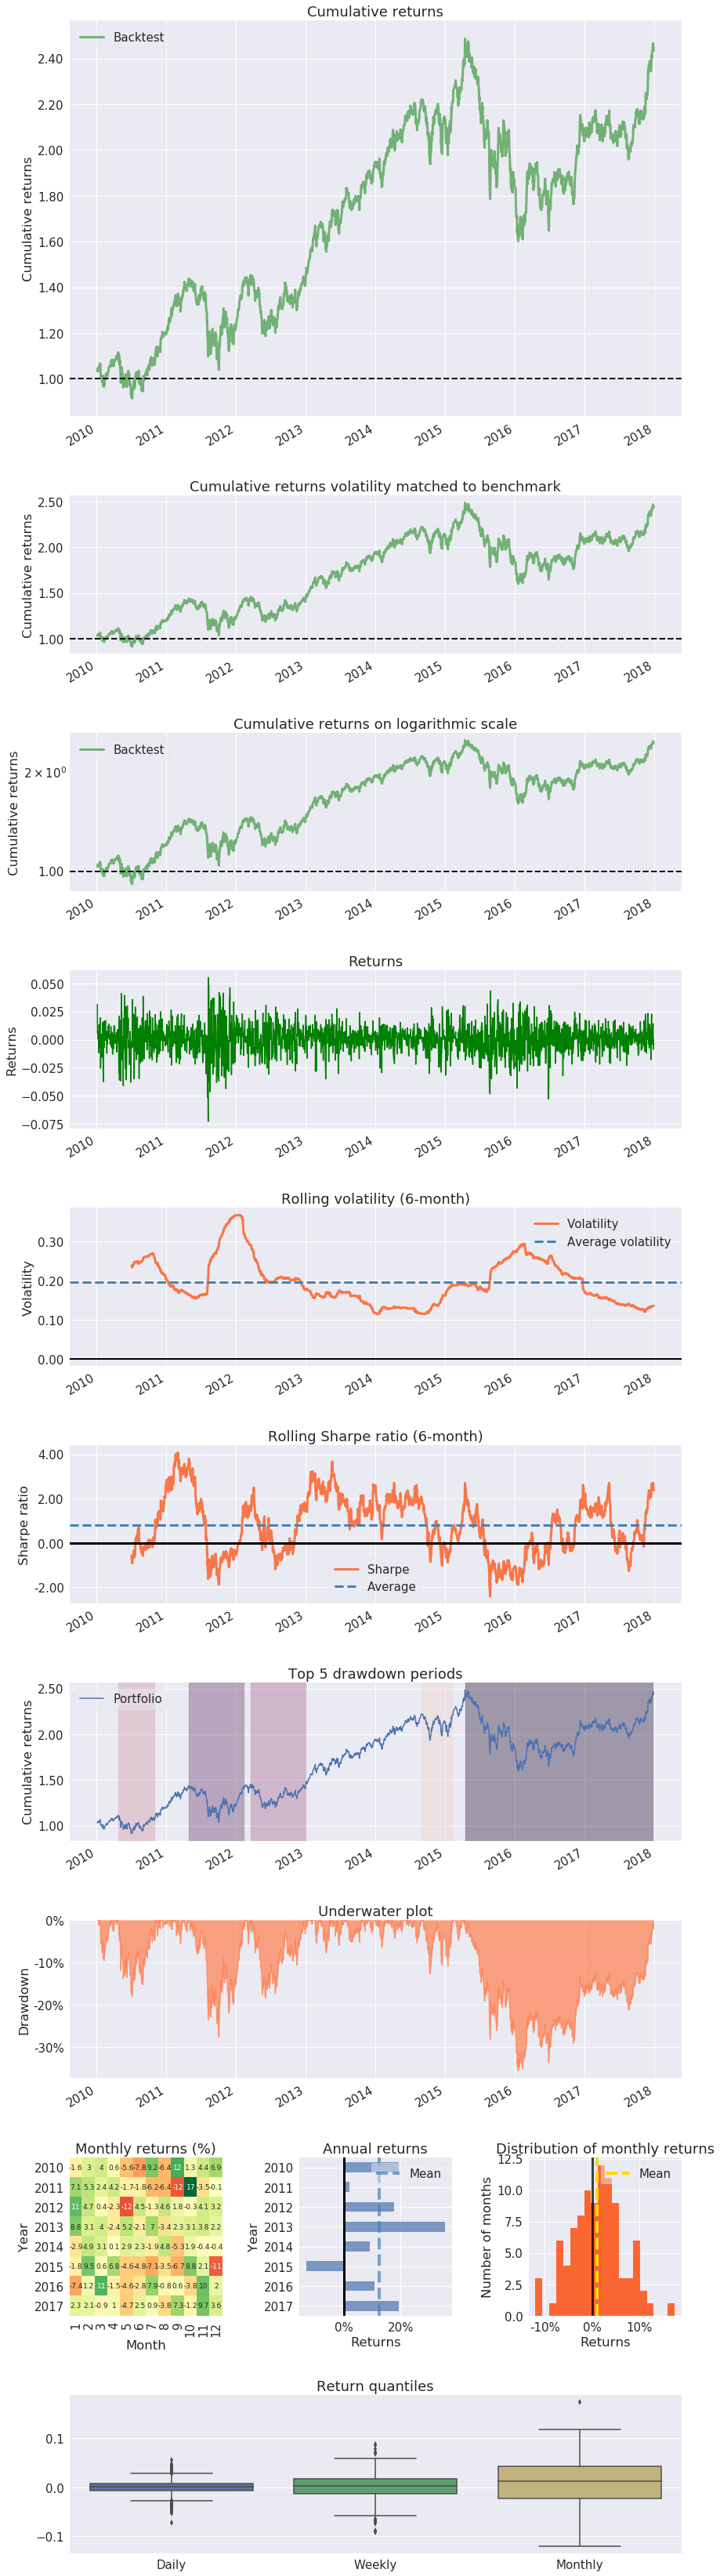

Stress Events,mean,min,max
US downgrade/European Debt Crisis,-0.07%,-7.28%,5.52%
Fukushima,0.27%,-1.77%,2.32%
EZB IR Event,-0.14%,-2.22%,1.84%
Flash Crash,-0.58%,-3.67%,4.11%
Apr14,0.04%,-2.13%,1.28%
Oct14,0.09%,-3.02%,2.84%
Fall2015,-0.31%,-4.83%,4.33%
Recovery,0.06%,-7.28%,5.52%
New Normal,0.05%,-5.29%,4.33%


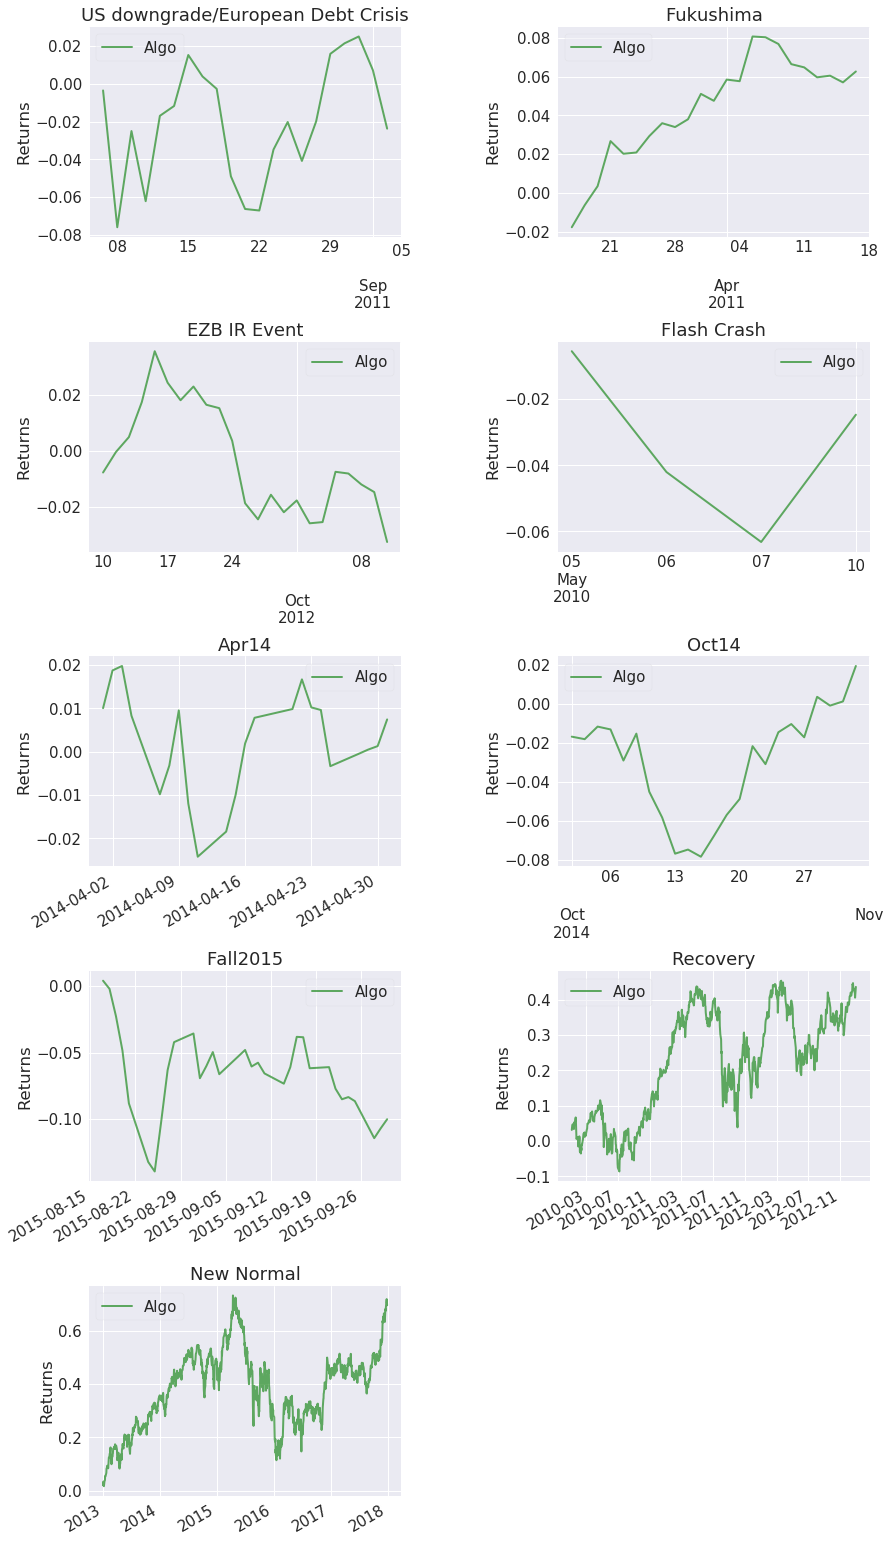

Top 10 long positions of all time,max
qval,100.00%


Top 10 short positions of all time,max


Top 10 positions of all time,max
qval,100.00%


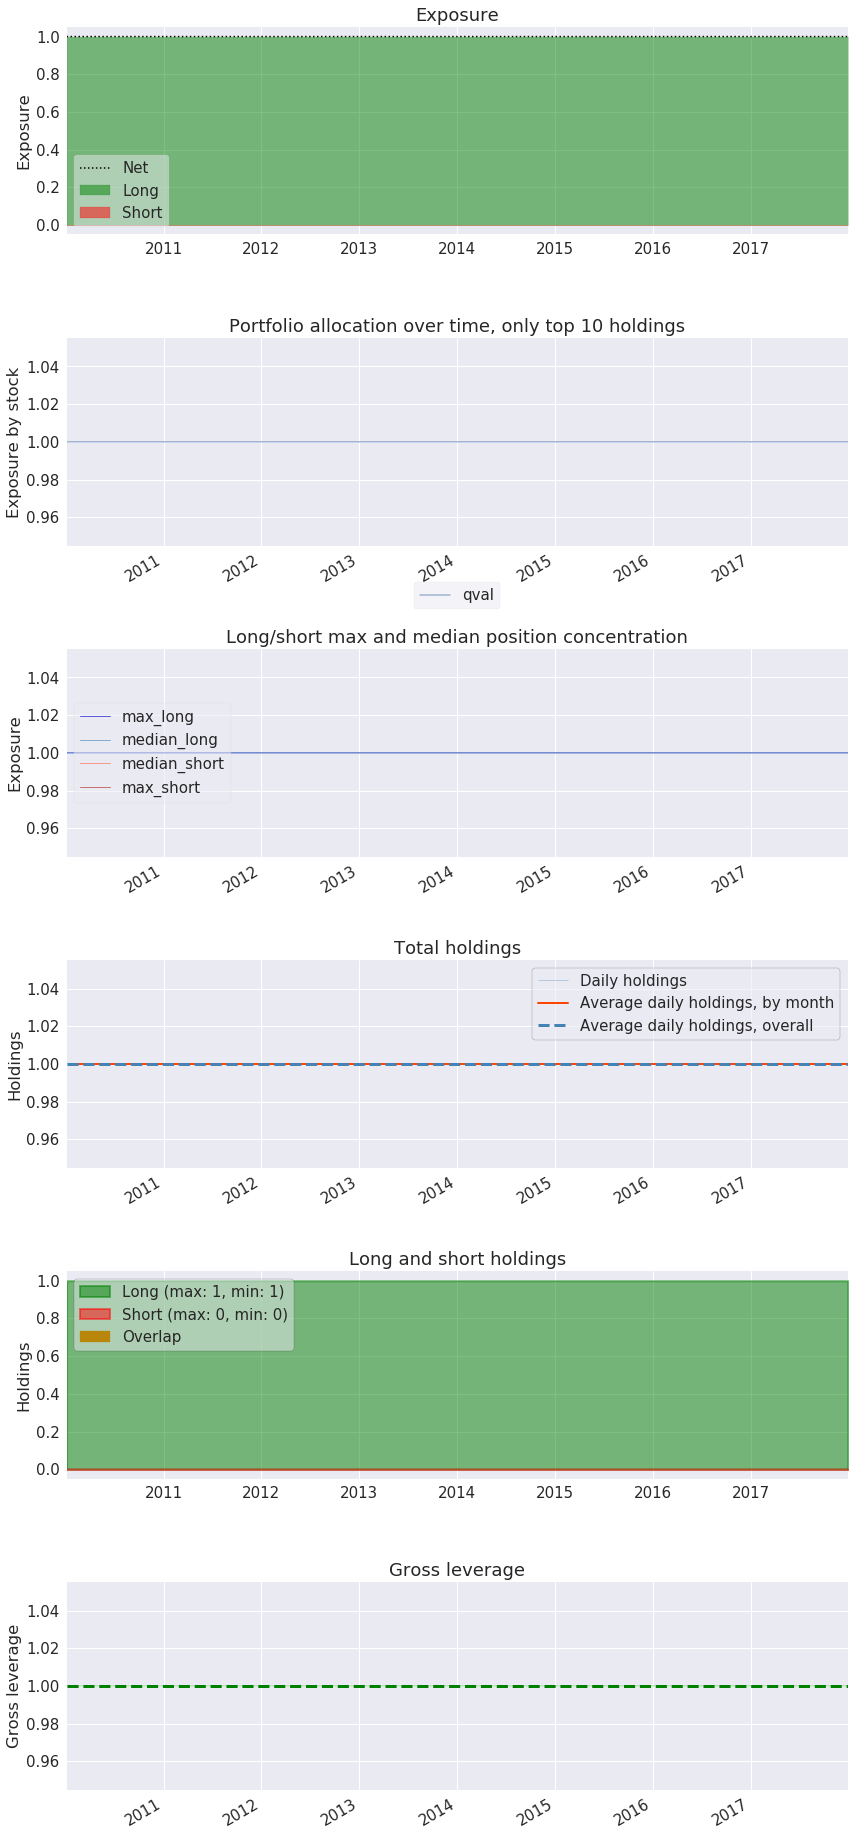

In [5]:
pf.from_moonshot_csv("qval_backtest.csv")

***

## *Next Up*

Part 5: [Parameter Scans](Part5-Parameter-Scans.ipynb)